<a href="https://colab.research.google.com/github/Rohit4352/Admission-predictor/blob/new/eda_admission_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\textrm{Admission data Analysis and Prediction}$$

# Table of contents

* [1: Introduction](#T1)
* [2: Importing Libraries and Dataset](#T2)
* [3: Perform Exploratory data Analysis](#T3)
* [4: Perform data Visualization](#T4)
* [5: Creating Train & Test set](#T5)
* [6: Train and Evaluate Model](#T6)
    - [6.1: Liner Regressor](#T61)
    - [6.2: Decision Tree and Random Forest model](#T62)
* [7: Train and Evaluate Artificial Neural Network(ANN)](#T7)
* [8: Checking the score of Regressors](#T8)
* [9: Plotting the Plots](#T9)
* [10: Calculate Regression model KPIs](#T10)

<a id="T1"></a>
# Introduction

  In this project, we have build different regression models to predict the chance of admission into a particular university based on the student’s profile.

## INPUTS (features)
---
  * GRE scores (out of 340)
  *	TOEFL Scores (out of 120)
  *	University rating (out of 5)
  *	Undergraduate GPA (out of 10)
  *	Statement of purpose( SOP)
  *	Letter of Recommendation (LOR) strength (out of 5)
  *	Research experience (either 0 or 1)


## OUTPUTS (dependent variables)
---
     Chance of admission (ranging from 0 to 1)








<a id="T2"></a>
# Importing Libraries and the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # mathematical plotting library

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read the dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));
        
admission_df = pd.read_csv('/content/Admission_predict.csv',index_col="Serial No.")
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


<a id="T3"></a>
# Perform Exploratory data analysis

In [3]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


No null entries in the records

In [4]:
admission_df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [5]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df_univ = admission_df.groupby(by  = 'University Rating').mean()
df_univ

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


<a id="T4"></a>
# Perform data visualization

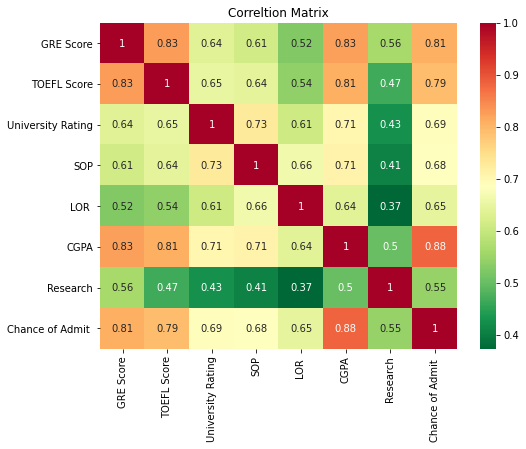

In [8]:
matrix = admission_df.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="RdYlGn_r")
plt.title("Correltion Matrix");

GRE score, TOEFL score, CGPA is highly correlated with chance of admission.

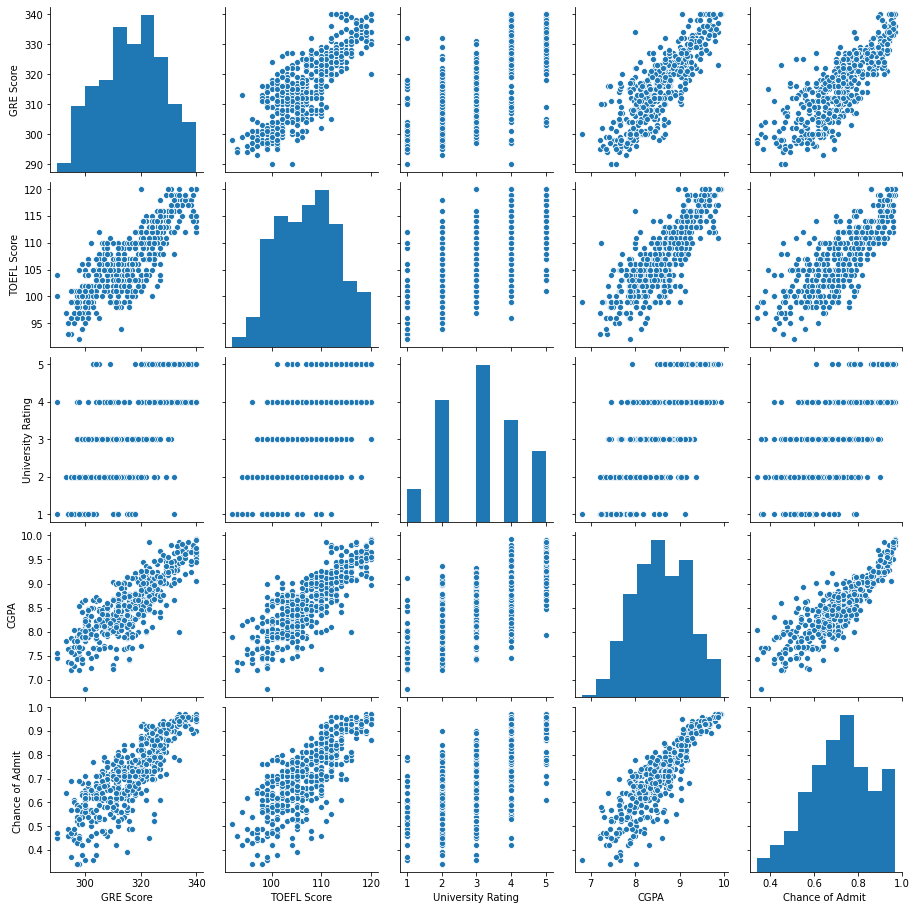

In [9]:
#correlatoin pair plots
sns.pairplot(admission_df.drop(columns=["LOR ","SOP","Research"]));

CGPA, GRE, TOEFL are positively related to chance of admit

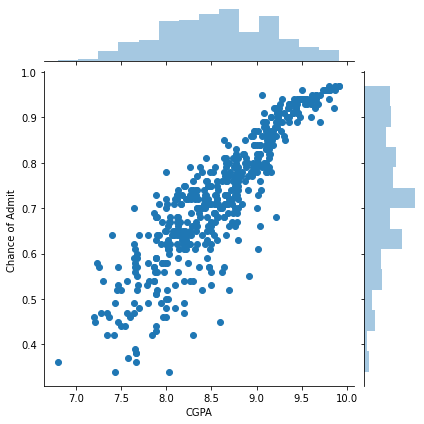

In [10]:
sns.jointplot(x="CGPA",y="Chance of Admit ",data=admission_df);

High CGPA increases the chance of admission

In [11]:
num = [304.91176471, 309.13492063, 315.0308642 , 323.3047619 ,
       327.89041096]

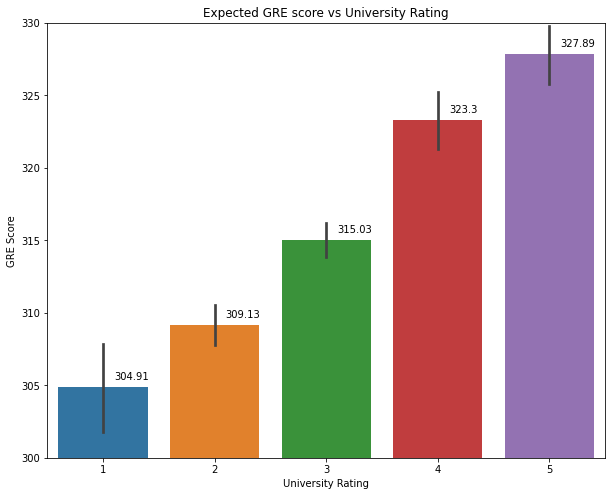

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(y="GRE Score",x="University Rating",data=admission_df)
plt.ylim([300,330])
li = 0.1
for i in range(5):
    plt.text(li , num[i]+0.5, np.round(num[i],2) )
    li+=1
plt.title("Expected GRE score vs University Rating");

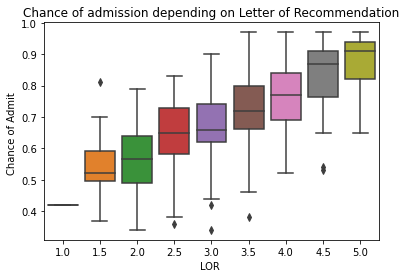

In [13]:
sns.boxplot(x="LOR ",y="Chance of Admit ",data=admission_df)
plt.title("Chance of admission depending on Letter of Recommendation");

LOR at 1.5 and 4.5 had an outlier, i.e. the chance of admission of a candidate is higher with low LOR, similarily at 4.5 the chance of admission become less.

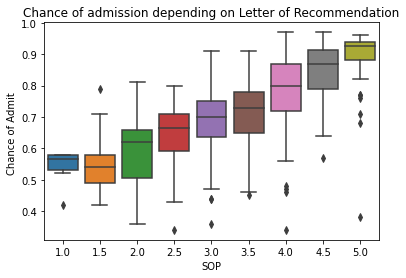

In [14]:
sns.boxplot(x="SOP",y="Chance of Admit ",data=admission_df)
plt.title("Chance of admission depending on Letter of Recommendation");

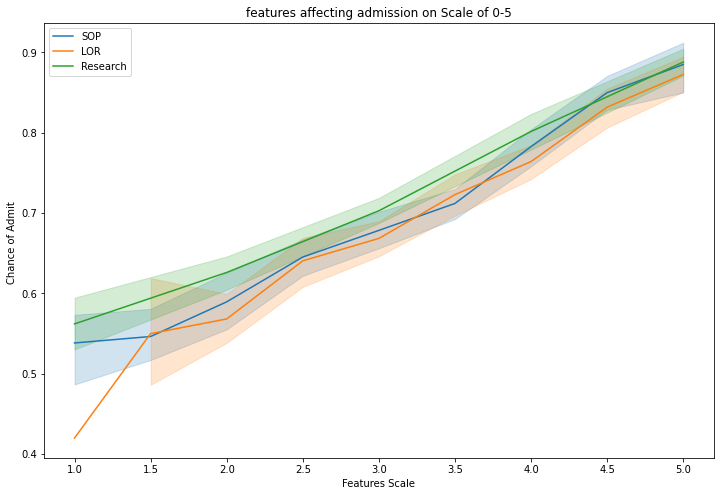

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(x="SOP",y="Chance of Admit ",data=admission_df, label="SOP")
sns.lineplot(x="LOR ",y="Chance of Admit ",data=admission_df, label="LOR")
sns.lineplot(x="University Rating",y="Chance of Admit ",data=admission_df, label="Research")
plt.legend()
plt.title("features affecting admission on Scale of 0-5")
plt.xlabel("Features Scale")
plt.show()

SOP has a outlier at 5.0 

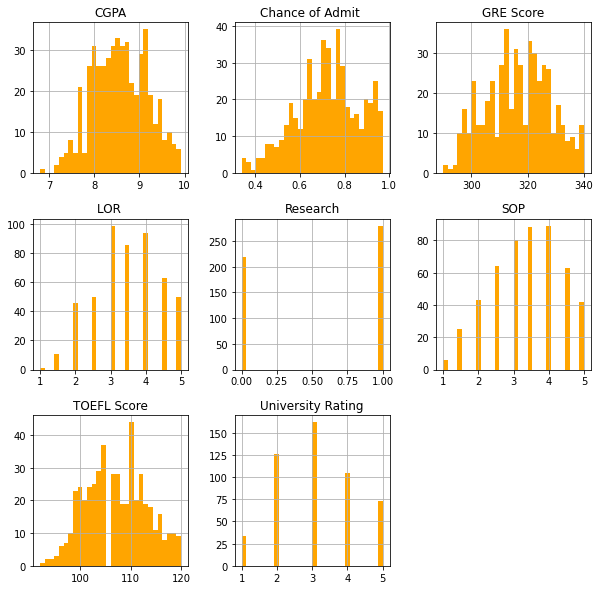

In [16]:
#creating histograms
admission_df.hist(bins = 30, figsize=(10,10), color= 'orange');

<a id="T5"></a>
# Create training and testing dataset 

In [17]:
#create the dependent and independent dataset
#splitting training and test set 
#test set is last 100 observations

X_train=admission_df.iloc[0:400,:-1].values
y_train= admission_df.iloc[0:400,-1].values
X_test=admission_df.iloc[400:500,:-1].values
y_test= admission_df.iloc[400:500,-1].values

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
GRE=[]
TOEFL=[]

for i in range(X_train.shape[0]):
    GRE.append(X_train[i][1])
    TOEFL.append(X_train[i][0])

Text(0.5, 1.0, 'Density chart of GRE vs TOEFL')

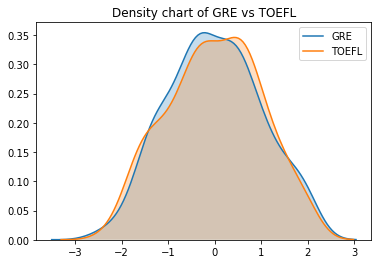

In [20]:
sns.kdeplot(GRE, shade=True, label="GRE")
sns.kdeplot(TOEFL, shade=True, label="TOEFL")
plt.title("Density chart of GRE vs TOEFL")

<a id="T6"></a>
# Train and evaluate model

<a id="T61"></a>
## Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_lin_pred = linear_reg.predict(X_test)

<a id="T62"></a>
## Decision Tress and Random Forest Models

In [23]:
from sklearn.tree import DecisionTreeRegressor
Decision_regressor = DecisionTreeRegressor(random_state = 0)
Decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [24]:
y_decision_pred = Decision_regressor.predict(X_test)

In [25]:
from sklearn.ensemble import RandomForestRegressor
Forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
Forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [26]:
y_forest_pred = Forest_regressor.predict(X_test)

<a id="T7"></a>
# Train and evaluate an Artificial Neural Network (ANN)

In [27]:
#Libraries to train Neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim=7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))


ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()


In [29]:
#Using Adam optimizer
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20);

In [31]:
y_ann_pred = ANN_model.predict(X_test)
result = ANN_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0041


In [32]:
epochs_hist.history.keys()

dict_keys(['loss'])

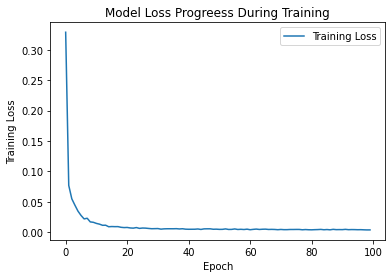

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progreess During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

<a id="T8"></a>
# Checking the Score of Regressors

In [34]:
from sklearn.metrics import accuracy_score
acc_lin = linear_reg.score(X_test, y_test)
print("Liner Accuracy : {}".format(acc_lin))

Liner Accuracy : 0.898286909853386


In [35]:
acc_decision = Decision_regressor.score(X_test, y_test)
print("Decision Accuracy : {}".format(acc_decision))

Decision Accuracy : 0.5713334190519338


In [36]:
acc_forest = Forest_regressor.score(X_test, y_test)
print("Forest Accuracy : {}".format(acc_forest))

Forest Accuracy : 0.8589290233432352


In [37]:
acc_ANN = 1 - ANN_model.evaluate(X_test, y_test)
print("ANN Accuracy : {}".format(acc_ANN))

4/4 [==============================] - 0s 1ms/step - loss: 0.0041
ANN Accuracy : 0.9959076181985438


<a id="T9"></a>
# Plotting the plots

Text(0.5, 1.0, 'ANN plot')

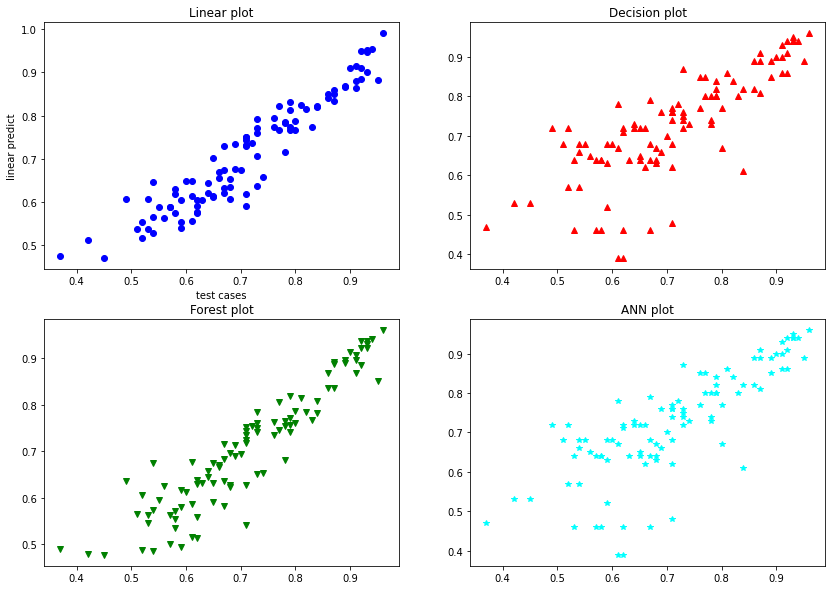

In [38]:
plt.figure(figsize= (14,10))
#y_test on x axis
#y_pred on y axis
plt.subplot(221)
plt.plot(y_test, y_lin_pred,'o', color = 'b')
plt.title('Linear plot')
plt.ylabel("linear predict")
plt.xlabel("test cases")

plt.subplot(222)
plt.plot(y_test, y_decision_pred, '^', color = 'r')
plt.title('Decision plot')

plt.subplot(223)
plt.plot(y_test, y_forest_pred, 'v', color = 'g')
plt.title('Forest plot')

plt.subplot(224)
plt.plot(y_test, y_decision_pred, '*', color = 'aqua')
plt.title('ANN plot')


<a id="T10"></a>
# Calculate Regression Model KPIs

Model performance metrics

   In regression model, the most commonly known evaluation metrics include:

   * **R-squared (R2)**, which is the proportion of variation in the outcome that is explained by the predictor variables. 
    
    It provides an indication of Goodness Of Fit.
         In multiple regression models, R2 corresponds to the squared correlation between the observed and the predicted values by the model. 
          The Higher the R-squared, the better the model.

* **Adjusted R-squared**, which adjusts the R2 for having too many variables in the model.
        If useless predictors are added to model, the R2 will decrease.
        If useful predictoes are added to model, the R2 will increase.

* Mean Absolute Error (MAE), the MAE measures the prediction error. 
        Mathematically,  MAE = mean(abs(observeds - predicteds))
        MAE is less sensitive to outliers compared to RMSE.
        If MAE is 0, indicates predictions are perfect.

* Mean Squared Error is the average squared difference between the observed actual outome values and the values predicted by the model. 
        Mathematically, MSE = mean((observeds - predicteds)^2)

* Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. 
        Mathematically, RMSE = sqrt(MSE)
        The lower the RMSE, the better the model.

* Residual Standard Error (RSE), also known as the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. 
        Mathematically, RSE = abs(observed-predict)
        The lower the RSE, the better the model. 
    

In [39]:
k = X_test.shape[1]
n= len(X_test)
k,n 

(7, 100)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

r2 = r2_score(y_test, y_lin_pred)
adj_r2 = 1- (1-r2)*(n-1)/(n-k-1)
MAE = mean_absolute_error(y_test, y_lin_pred)
MSE = mean_squared_error(y_test, y_lin_pred)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_lin_pred)),'.3f'))

print('R2 - ', r2, '\nAdjusted R2 - ', adj_r2, '\nMAE - ', MAE, '\nMSE - ', MSE, '\nRMSE - ', RMSE)

R2 -  0.898286909853386 
Adjusted R2 -  0.8905478703857088 
MAE -  0.0339099570441833 
MSE -  0.0018431744376047375 
RMSE -  0.043


In [41]:
from statsmodels.api import OLS

In [42]:
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              1.731
Date:                Fri, 14 Aug 2020   Prob (F-statistic):                       0.100
Time:                        11:22:31   Log-Likelihood:                         -440.10
No. Observations:                 400   AIC:                                      894.2
Df Residuals:                     393   BIC:                                      922.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0199      0.079      0.253      0.801      -0.135       0.175
x2             0.0177      0.076      0.233      0.816      -0.132       0.167
x3             0.0065      0.063      0.104      0.917      -0.117       0.130
x4            -0.0033      0.064     -0.052      0.959      -0.130       0.123
x5             0.0201      0.057      0.351      0.726      -0.092       0.132
x6             0.0708      0.084      0.846      0.398      -0.094       0.235
x7             0.0122      0.046      0.268      0.789      -0.077       0.102
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""